In [1]:
!pip install openvino-dev

# Check if XPU (GPU, CPU, etc.) is available using OpenVINO
from openvino.runtime import Core

core = Core()
available_devices = core.available_devices

print("Available devices:")
for device in available_devices:
    print(f" - {device}")

Available devices:
 - CPU
 - GPU


In [2]:
import zipfile
import os

zip_path = "apic-bee-pose-dataset-master.zip"
extract_to = "bee_pose_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted to: {os.path.abspath(extract_to)}")

Extracted to: /opt/notebooks/bee_pose_dataset


In [3]:
import os

for root, dirs, files in os.walk("bee_pose_dataset"):
    print(f"\n📁 {root}")
    for file in files[:5]:  # show only first 5 files per folder
        print(f" - {file}")


📁 bee_pose_dataset

📁 bee_pose_dataset/apic-bee-pose-dataset-master
 - LICENSE
 - .gitignore
 - CONTRIBUTING.md
 - README.md
 - plot.sh

📁 bee_pose_dataset/apic-bee-pose-dataset-master/utils
 - imageUtils.py
 - drawPoseUtils.py
 - definitions.py
 - __init__.py

📁 bee_pose_dataset/apic-bee-pose-dataset-master/doc

📁 bee_pose_dataset/apic-bee-pose-dataset-master/doc/img
 - bee.gif
 - red_bee.gif
 - our_metric.png
 - our_results.png
 - pose_title.png

📁 bee_pose_dataset/apic-bee-pose-dataset-master/data
 - pose_dataset.json

📁 bee_pose_dataset/apic-bee-pose-dataset-master/data/pose
 - video_1536_bee_id6003_f2764.png
 - video_1536_bee_id6003_f2738.png
 - hoepfner-275.jpeg
 - swe-335.jpeg
 - video_1536_bee_id6003_f2772.png


In [4]:
import json

# Path to the annotation file
pose_path = "bee_pose_dataset/apic-bee-pose-dataset-master/data/pose_dataset.json"

# Load the pose data
with open(pose_path, 'r') as f:
    pose_data = json.load(f)

# Print summary
print(f"Total samples: {len(pose_data)}")
print("Sample keys:", list(pose_data[0].keys()))
print("\nSample entry:")
print(json.dumps(pose_data[0], indent=2))

Total samples: 229
Sample keys: ['path', 'set', 'dataset', 'keypoints']

Sample entry:
{
  "path": "pose/video_103_2018-10-05T04-47-09_bee_id20834_f2353.png",
  "set": "train",
  "dataset": "apic",
  "keypoints": {
    "0": [
      201,
      189
    ],
    "1": [
      205,
      170
    ],
    "2": [
      183,
      188
    ],
    "3": [
      189,
      172
    ],
    "4": [
      166,
      150
    ],
    "5": [
      105,
      94
    ],
    "6": [
      137,
      64
    ],
    "7": [
      92,
      110
    ],
    "20": [
      176,
      176
    ],
    "21": [
      169,
      183
    ],
    "22": [
      171,
      191
    ],
    "23": [
      176,
      200
    ],
    "24": [
      156,
      160
    ],
    "25": [
      148,
      166
    ],
    "26": [
      146,
      176
    ],
    "27": [
      149,
      200
    ],
    "28": [
      149,
      156
    ],
    "29": [
      140,
      158
    ],
    "30": [
      122,
      147
    ],
    "31": [
      83,
      144
    

In [5]:
!pip install opencv-python matplotlib

In [13]:
df_pose_features.columns

Index(['image', 'bee_id', 'frame_id', 'head_x', 'head_y', 'tail_x', 'tail_y',
       'dx', 'dy', 'angle_deg'],
      dtype='object')

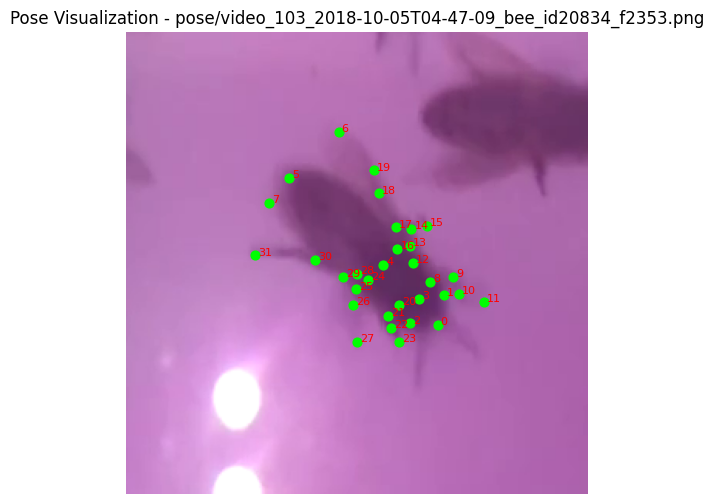

In [6]:
import json
import cv2
import matplotlib.pyplot as plt

# Paths
json_path = "bee_pose_dataset/apic-bee-pose-dataset-master/data/pose_dataset.json"
image_folder = "bee_pose_dataset/apic-bee-pose-dataset-master/data"

# Load annotation file
with open(json_path, 'r') as f:
    data = json.load(f)

# Choose a sample
sample = data[0]
img_path = f"{image_folder}/{sample['path']}"
keypoints = sample['keypoints']

# Load image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot keypoints on image
plt.figure(figsize=(8, 6))
plt.imshow(img)

# Draw keypoints
for idx, (x, y) in keypoints.items():
    plt.scatter(x, y, c='lime', s=40)
    plt.text(x + 2, y, str(idx), color='red', fontsize=8)

plt.title(f"Pose Visualization - {sample['path']}")
plt.axis('off')
plt.show()

In [7]:
import numpy as np

def compute_body_angle(kp_dict, head_id=1, tail_id=23):
    x1, y1 = kp_dict[str(head_id)]
    x2, y2 = kp_dict[str(tail_id)]
    
    # Vector from head to tail
    dx = x2 - x1
    dy = y2 - y1
    
    # Compute angle w.r.t vertical (Y-axis)
    angle_rad = np.arctan2(dx, -dy)  # negative dy to align with image Y-axis
    angle_deg = np.degrees(angle_rad)
    
    return angle_deg % 360  # make sure it's [0, 360)

# Test on sample
angle = compute_body_angle(sample['keypoints'])
print(f"🐝 Body angle: {angle:.2f}°")

🐝 Body angle: 224.03°


In [8]:
!pip install pandas

In [14]:
import re

# Extract bee ID from path
def extract_bee_id(path):
    match = re.search(r"bee_id(\d+)", path)
    return match.group(1) if match else None

# Add bee_id column
df_pose_features["bee_id"] = df_pose_features["image"].apply(extract_bee_id)

# Choose a bee with many frames
sample_bee_id = df_pose_features["bee_id"].value_counts().idxmax()
df_bee = df_pose_features[df_pose_features["bee_id"] == sample_bee_id].copy()

# Extract & sort by frame number from image name
df_bee["frame_id"] = df_bee["image"].str.extract(r"_f(\d+)", expand=False).astype(int)
df_bee = df_bee.sort_values("frame_id")

df_bee.head()

,image,bee_id,frame_id,head_x,head_y,tail_x,tail_y,dx,dy,angle_deg
86,pose/video_1536_bee_id6003_f2731.png,6003,2731,161,199,102,188,-59,-11,280.561011
84,pose/video_1536_bee_id6003_f2732.png,6003,2732,180,177,94,220,-86,43,243.434949
85,pose/video_1536_bee_id6003_f2733.png,6003,2733,175,195,108,201,-67,6,264.882685
87,pose/video_1536_bee_id6003_f2734.png,6003,2734,170,196,116,180,-54,-16,286.504361
88,pose/video_1536_bee_id6003_f2735.png,6003,2735,169,202,114,180,-55,-22,291.801409


In [12]:
import pandas as pd

angles = []

feature_rows = []

for entry in data:
    try:
        if "keypoints" not in entry:
            continue

        kp = entry["keypoints"]

        # Only if both head (1) and tail (23) are present
        if '1' not in kp or '23' not in kp:
            continue

        # Extract x, y positions
        head_x, head_y = kp['1']
        tail_x, tail_y = kp['23']

        dx = tail_x - head_x
        dy = tail_y - head_y

        angle = compute_body_angle(kp)
        bee_id = extract_bee_id(entry["path"])
        frame_id = int(re.search(r"_f(\d+)", entry["path"]).group(1))

        feature_rows.append({
            "image": entry["path"],
            "bee_id": bee_id,
            "frame_id": frame_id,
            "head_x": head_x,
            "head_y": head_y,
            "tail_x": tail_x,
            "tail_y": tail_y,
            "dx": dx,
            "dy": dy,
            "angle_deg": angle
        })

    except Exception as e:
        print(f"Skipping {entry['path']} due to error: {e}")

df_pose_features = pd.DataFrame(feature_rows)
df_pose_features.to_csv("bee_direction_features.csv", index=False)

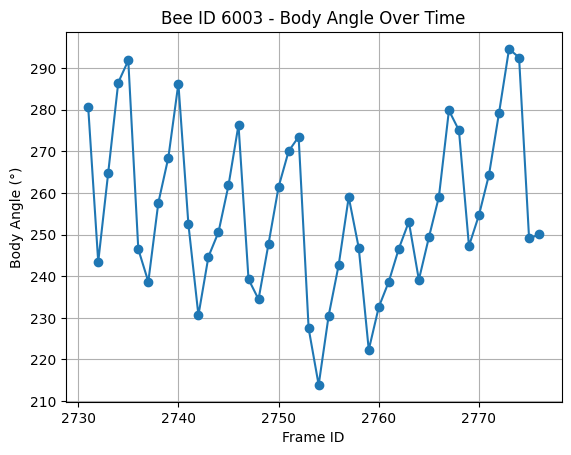

In [15]:
# Plot Angle Time Series
plt.plot(df_bee["frame_id"], df_bee["angle_deg"], marker='o')
plt.title(f"Bee ID {sample_bee_id} - Body Angle Over Time")
plt.xlabel("Frame ID")
plt.ylabel("Body Angle (°)")
plt.grid(True)
plt.show()

In [16]:
# Detect Wiggle Zones (Low Angle Variance)
# Smooth the angle signal
df_bee["angle_smooth"] = df_bee["angle_deg"].rolling(window=3, center=True).mean()

# Compute rolling variance
df_bee["angle_var"] = df_bee["angle_smooth"].rolling(window=5, center=True).var()

# Threshold to detect wiggle loop
WIGGLE_THRESHOLD = 20  # tweak this as needed
df_bee["wiggle"] = df_bee["angle_var"] < WIGGLE_THRESHOLD

df_bee[["frame_id", "angle_deg", "angle_var", "wiggle"]].head(10)

,frame_id,angle_deg,angle_var,wiggle
86,2731,280.561011,NaN,False
84,2732,243.434949,NaN,False
85,2733,264.882685,NaN,False
87,2734,286.504361,83.266196,False
88,2735,291.801409,173.633648,False
90,2736,246.467651,196.459978,False
89,2737,238.671307,127.381089,False
128,2738,257.637508,94.805016,False
129,2739,268.492564,97.723095,False
103,2740,286.260205,133.160118,False


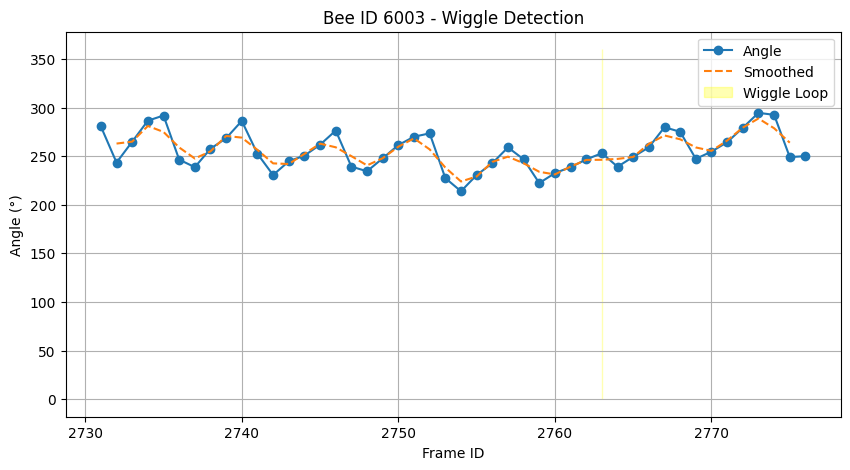

In [17]:
# Visualize Detected Wiggle Regions
plt.figure(figsize=(10,5))
plt.plot(df_bee["frame_id"], df_bee["angle_deg"], label="Angle", marker='o')
plt.plot(df_bee["frame_id"], df_bee["angle_smooth"], label="Smoothed", linestyle="--")
plt.fill_between(df_bee["frame_id"], 0, 360, where=df_bee["wiggle"], color='yellow', alpha=0.3, label="Wiggle Loop")
plt.title(f"Bee ID {sample_bee_id} - Wiggle Detection")
plt.xlabel("Frame ID")
plt.ylabel("Angle (°)")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Build Final Feature Table
# Start from clean DataFrame (angles already calculated per bee)
feature_rows = []

for entry in df_pose_features.itertuples():
    try:
        bee_id = extract_bee_id(entry.image)
        frame_id = int(re.search(r"_f(\d+)", entry.image).group(1))
        angle = entry.angle_deg

        feature_rows.append({
            "image": entry.image,
            "bee_id": bee_id,
            "frame_id": frame_id,
            "angle_deg": angle,
        })

    except Exception as e:
        print(f"Skipping {entry.image} due to: {e}")

df_features = pd.DataFrame(feature_rows)

df_features = df_features.sort_values(["bee_id", "frame_id"])
df_features["angle_smooth"] = df_features.groupby("bee_id")["angle_deg"].transform(lambda x: x.rolling(window=3, center=True).mean())
df_features["angle_var"] = df_features.groupby("bee_id")["angle_smooth"].transform(lambda x: x.rolling(window=5, center=True).var())
df_features["wiggle"] = df_features["angle_var"] < 20

df_features.head()

,image,bee_id,frame_id,angle_deg,angle_smooth,angle_var,wiggle
3,pose/video_1000_2018-10-06T17-08-41_bee_id1233...,1233,908,102.804266,NaN,NaN,False
2,pose/video_1000_2018-10-06T17-08-41_bee_id1233...,1233,909,119.981639,107.085683,NaN,False
5,pose/video_1000_2018-10-06T17-08-41_bee_id1233...,1233,910,98.471145,104.841747,NaN,False
4,pose/video_1000_2018-10-06T17-08-41_bee_id1233...,1233,911,96.072456,100.108118,13.372124,True
6,pose/video_1000_2018-10-06T17-08-41_bee_id1233...,1233,912,105.780753,104.494699,12.501242,True


In [20]:
df_features.to_csv("bee_wiggle_features.csv", index=False)
print("Exported to bee_wiggle_features.csv")

Exported to bee_wiggle_features.csv


In [21]:
!pip install scikit-learn

In [22]:
# Train a Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Drop rows with NaN angle_var
df_clean = df_features.dropna(subset=["angle_var"])

# Features and target
X = df_clean[["angle_deg", "angle_var"]]
y = df_clean["wiggle"].astype(int)  # Convert bool to 0/1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         4

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [23]:
# Train Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Clean NaNs (just in case)
df_reg = df_pose_features.dropna(subset=["dx", "dy", "angle_deg"])

# Features and target
X = df_reg[["dx", "dy"]]
y = df_reg["angle_deg"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train the regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📈 Mean Absolute Error: {mae:.2f}°")
print(f"🔁 R² Score: {r2:.3f}")

📈 Mean Absolute Error: 3.90°
🔁 R² Score: 0.988


In [41]:
# Compute quartiles from actual data
q1 = df_features["angle_var"].quantile(0.25)  # Lower 25% (stable)
q3 = df_features["angle_var"].quantile(0.75)  # Upper 25% (unstable)

In [42]:
def health_score(row):
    if pd.isna(row["angle_var"]):
        return "🟡 Low activity"  # Not enough data

    # Healthy = stable (low var) AND performing waggle
    elif row["angle_var"] < q1 and row["wiggle"]:
        return "✅ Healthy"

    # Stress = high variance (disoriented)
    elif row["angle_var"] > q3:
        return "⚠️ Stress"

    # Everything else = medium activity or uncertain
    else:
        return "🟡 Low activity"

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


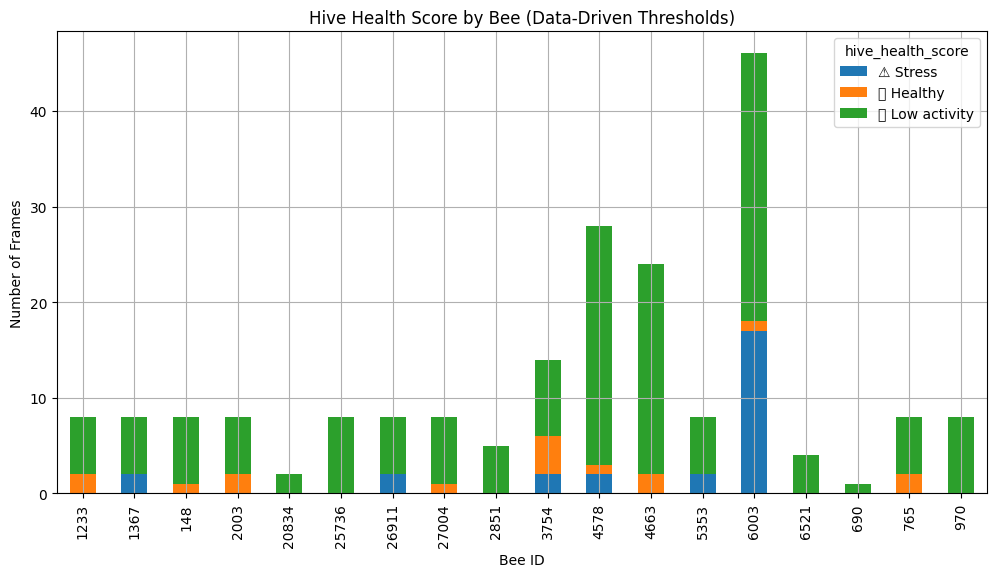

In [43]:
df_features["hive_health_score"] = df_features.apply(health_score, axis=1)

# Replot
df_health_trend = df_features.groupby("bee_id")["hive_health_score"].value_counts().unstack().fillna(0)
df_health_trend.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Hive Health Score by Bee (Data-Driven Thresholds)")
plt.ylabel("Number of Frames")
plt.xlabel("Bee ID")
plt.grid(True)
plt.show()

In [44]:
# Export the final dataset with positional + angle info
df_pose_features.to_csv("final_bee_wiggle_features.csv", index=False)
print("Saved as final_bee_wiggle_features.csv")

Saved as final_bee_wiggle_features.csv
